**Black-Scholes Pricing Model with Greeks**

Implementation of the **Black-Scholes model** for pricing European options and computing their sensitivities, known as **Greeks**.

**Assumptions of the Black-Scholes Model**

1. The stock price follows a **geometric Brownian motion** with constant drift $\mu$ and volatility $\sigma$.
2. The risk-free interest rate $r$ is constant and known.
3. No dividends are paid on the underlying asset.
4. Markets are frictionless (no transaction costs, no arbitrage, continuous trading).
5. The option is **European-style**, exercisable only at maturity $T$.

**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from math import log, sqrt, exp
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


**Black Scholes Option Class**

In [9]:
class EuropeanOption:
    def __init__(self, S, K, T, r, sigma, option_type='call'):
        self.S = S          # Spot price
        self.K = K          # Strike price
        self.T = T          # Time to maturity (in years)
        self.r = r          # Risk-free rate
        self.sigma = sigma  # Volatility
        self.option_type = option_type.lower()

        self._d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        self._d2 = self._d1 - self.sigma * np.sqrt(self.T)

        logging.info(f'Initialized {self.option_type} option with S={self.S}, K={self.K}, T={self.T}, r={self.r}, sigma={self.sigma}')

    def price(self):
        if self.option_type == 'call':
            return self.S * norm.cdf(self._d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(self._d2)
        elif self.option_type == 'put':
            return self.K * np.exp(-self.r * self.T) * norm.cdf(-self._d2) - self.S * norm.cdf(-self._d1)
        else:
            raise ValueError("option_type must be 'call' or 'put'")

    def greeks(self):
        delta = norm.cdf(self._d1) if self.option_type == 'call' else norm.cdf(self._d1) - 1
        gamma = norm.pdf(self._d1) / (self.S * self.sigma * np.sqrt(self.T))
        vega = self.S * norm.pdf(self._d1) * np.sqrt(self.T)
        theta = self._theta()
        rho = self._rho()

        return {'Delta': delta, 'Gamma': gamma, 'Vega': vega / 100, 'Theta': theta / 365, 'Rho': rho / 100}

    def _theta(self):
        term1 = - (self.S * norm.pdf(self._d1) * self.sigma) / (2 * np.sqrt(self.T))
        if self.option_type == 'call':
            term2 = self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(self._d2)
            return term1 - term2
        else:
            term2 = self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-self._d2)
            return term1 + term2

    def _rho(self):
        if self.option_type == 'call':
            return self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(self._d2)
        else:
            return -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-self._d2)


**Visualizing the Option Price vs Spot Price**

In [12]:
def plot_option_vs_spot(K, T, r, sigma, option_type = 'call'):
    S_range = np.linspace(0.5 * K, 1.5 * K, 100)
    prices = []
    
    for S in S_range:
        opt = EuropeanOption(S, K, T, r, sigma, option_type)
        prices.append(opt.price())
    
    plt.figure(figsize=(8, 5))
    plt.plot(S_range, prices, label=f'{option_type.capitalize()} Price')
    plt.axvline(K, color='gray', linestyle='--', label='Strike')
    plt.title(f'{option_type.capitalize()} Option Price vs Spot Price')
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)
    plt.show()

2025-07-27 00:23:16,049 - INFO - Initialized call option with S=50.0, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,060 - INFO - Initialized call option with S=51.01010101010101, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,061 - INFO - Initialized call option with S=52.02020202020202, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,062 - INFO - Initialized call option with S=53.03030303030303, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,062 - INFO - Initialized call option with S=54.04040404040404, K=100, T=1, r=0.05, sigma=0.2


2025-07-27 00:23:16,063 - INFO - Initialized call option with S=55.05050505050505, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,064 - INFO - Initialized call option with S=56.06060606060606, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,066 - INFO - Initialized call option with S=57.07070707070707, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,067 - INFO - Initialized call option with S=58.08080808080808, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,068 - INFO - Initialized call option with S=59.09090909090909, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,069 - INFO - Initialized call option with S=60.101010101010104, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,070 - INFO - Initialized call option with S=61.111111111111114, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,071 - INFO - Initialized call option with S=62.121212121212125, K=100, T=1, r=0.05, sigma=0.2
2025-07-27 00:23:16,072 - INFO - Initialized call option with S=63.131313131313135, K=100, T=

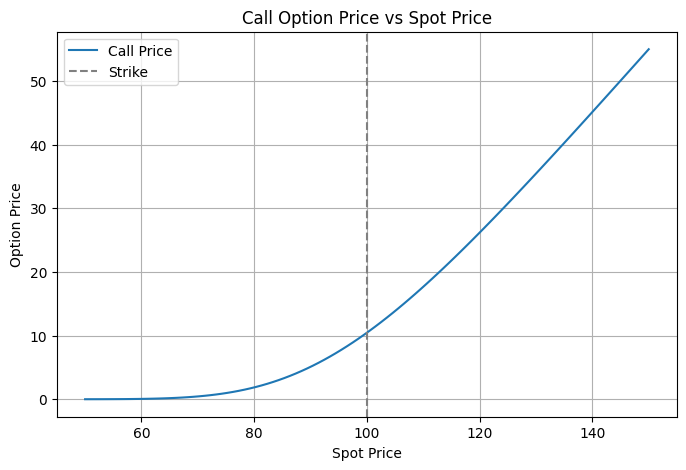

In [13]:
plot_option_vs_spot(K=100, T=1, r=0.05, sigma=0.2, option_type='call')

**Using real market data from Yahoo Finance**

In [14]:
ticker = 'AAPL'
stock = yf.Ticker(ticker)
spot_price = stock.history(period='5d')['Close'][-1]
print(f"Latest {ticker} price: {spot_price:.2f}")

# Create Option
option = EuropeanOption(S=spot_price, K=spot_price, T=0.25, r=0.05, sigma=0.25, option_type='call')
price = option.price()
greeks = option.greeks()

print(f"\nCall Option Price: ${price:.2f}")
print("Greeks:")
for greek, val in greeks.items():
    print(f"{greek}: {val:.4f}")


2025-07-27 00:24:07,601 - INFO - Initialized call option with S=213.8800048828125, K=213.8800048828125, T=0.25, r=0.05, sigma=0.25


Latest AAPL price: 213.88

Call Option Price: $11.97
Greeks:
Delta: 0.5645
Gamma: 0.0147
Vega: 0.4210
Theta: -0.0726
Rho: 0.2719


**Interpretation of Results (Black-Scholes European Call)**

Priced an **European call option** on AAPL using the Black-Scholes model and real market data.

**Inputs:**
- **Spot Price (S):** \$213.88
- **Strike Price (K):** \$213.88 (At-the-Money)
- **Time to Maturity (T):** 0.25 years (3 months)
- **Risk-Free Rate (r):** 5% annually
- **Volatility (σ):** 25% annually



Call Option Price: **\$11.97**

This is the fair theoretical price for the right (but not obligation) to buy AAPL at \$213.88 in 3 months. The option is **at-the-money**, which makes the premium primarily influenced by volatility and time value.


**Greeks Breakdown**

| Greek | Value | Interpretation |
|-------|-------|----------------|
| **Delta** | 0.5645 | For every $1 increase in AAPL, the option gains $0.56. Indicates ~56% exposure to the underlying stock. Useful for **Delta hedging**. |
| **Gamma** | 0.0147 | Gamma shows how much **Delta changes** for a \$1 move in AAPL. Higher near-the-money and close to expiry. Indicates **convexity**. |
| **Vega** | 0.4210 | For every 1% increase in implied volatility, the option gains ~\$0.42. Important for **volatility trading** and exposure. |
| **Theta** | -0.0726 | Option **loses ~7.3 cents per day** due to time decay. Crucial for understanding **decay risk** in long positions. |
| **Rho** | 0.2719 | A 1% rise in interest rates increases option value by ~\$0.27. More relevant for **long-dated options**. |



**Hedging Insight**

- Use **Delta** for directional hedging (e.g., Delta-neutral portfolios).
- Monitor **Gamma** to understand sensitivity of Delta — key for large movements.
- Trade **Vega** if you're positioning on volatility (IV spikes benefit buyers).
- Be aware of **Theta decay** — time works against holders, not writers.
- **Rho** matters in rate-sensitive instruments or macro trading strategies.



**Conclusion:**  
The Black-Scholes model offers a robust framework for pricing and risk management of European options. Understanding the **Greeks** equips traders and analysts to make more informed hedging and speculative decisions based on how options respond to different market conditions.
